In [1]:
from bs4 import BeautifulSoup as bs #Beautiful Soup is a Python library for pulling data out of HTML and XML files.
import requests # making HTTP requests in Python

In [2]:
bt='https://www.amazon.in'
ul='https://www.amazon.in/Apple-MacBook-Air-13-3-inch-MQD32HN/product-reviews/B073Q5R6VR/ref=cm_cr_getr_d_paging_btm_next_30?ie=UTF8&reviewerType=all_reviews'

In [3]:
cust_name = []   #define list to store Name of the customers
review_title = []
rate = []
review_content = []

In [4]:
tt = 0
while tt == 0:
    page = requests.get(ul)
    while page.ok == False:#if it fails to connect then this loop will be executing continuously until get response from site  
        page = requests.get(ul)
   

    soup = bs(page.content,'html.parser')
    soup.prettify()       #Prettify() function in BeautifulSoup will enable us to view how the tags are nested in the document.
    
    names = soup.find_all('span', class_='a-profile-name')
    names.pop(0)
    names.pop(0)
    
    for i in range(0,len(names)):
        cust_name.append(names[i].get_text())
        
    title = soup.find_all("a",{"data-hook":"review-title"})
    for i in range(0,len(title)):
        review_title.append(title[i].get_text())

    rating = soup.find_all('i',class_='review-rating')
    rating.pop(0)
    rating.pop(0)
    for i in range(0,len(rating)):
        rate.append(rating[i].get_text())

    review = soup.find_all("span",{"data-hook":"review-body"})
    for i in range(0,len(review)):
        review_content.append(review[i].get_text())
        
    try:
        for div in soup.findAll('li', attrs={'class':'a-last'}):
            A = div.find('a')['href']
        ul = bt + A
    except:
        break

In [6]:
len(cust_name)


2279

In [7]:
len(review_title)


2279

In [8]:
len(review_content)


2279

In [9]:
len(rate)


2279

In [10]:
!pip install -U textblob
!python -m textblob.download_corpora

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
import nltk
from nltk.corpus import stopwords
from nltk import ngrams
from nltk.tokenize import word_tokenize
from textblob import TextBlob, Word, Blobber
import wordcloud
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()
nltk.download('stopwords')

Finished.


[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\shashank\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\brown.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shashank\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\shashank\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\shashank\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data] Downloading package conll2000 to
[nltk_data]     C:\Users\shashank\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\conll2000.zip.
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\shashank\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\movie_reviews.zip.
[nltk_data] Downloading package stopwords to


True

In [11]:
df = pd.DataFrame()

In [12]:
df['Customer Name'] = cust_name
df['Review Title'] = review_title
df['Rating'] = rate
df['Reviews'] = review_content

In [13]:
df.head(10)

,Customer Name,Review Title,Rating,Reviews
0,Shantanu Bangar,\nSuperb\n,5.0 out of 5 stars,\n\n It's amazing..... battery last around 10...
1,Sumit Kukade,\nDEAD after 1 year two months...\n,1.0 out of 5 stars,\n\n We buy macbook's expecting that it will ...
2,Kaushal,\nJustified Apple Product\n,5.0 out of 5 stars,\n\n Pros:1. Light weight and super fast resp...
3,saurabh chauhan,\nMy first apple product: fully satisfied- her...,5.0 out of 5 stars,\n\n Best Laptop under 60k. If you don't want...
4,Anvit shetty,\nDead mac book air\n,1.0 out of 5 stars,"\n\n Bought this product recently on 5 April,..."
5,Amazon Customer,\nThe sound quality was not good. My laptop st...,1.0 out of 5 stars,\n\n Reason for 1 star is I ot an defective p...
6,Romeo Menezes,\nMacBook motherboard and battery collapsed.\n,1.0 out of 5 stars,\n\n I am very upset about the product as I c...
7,Jagdeep Sharma,\nTakes six figure out of your pocket and then...,1.0 out of 5 stars,"\n\n Hi, Think thousand time before buying. O..."
8,Jason,\nPerfect product!\n,4.0 out of 5 stars,\n\n I have been a Macbook pro user for last ...
9,Vishal Surani,\nWorst product hardwares\n,1.0 out of 5 stars,\n\n Never purchase any Apple products. I bou...


In [14]:
df.to_csv(r'E:fill.csv',index = True)

In [15]:
data = pd.read_csv("E:fill.csv",index_col=[0])

In [16]:
data.dtypes

Customer Name    object
Review Title     object
Rating           object
Reviews          object
dtype: object

In [18]:
data['Rating'] = [titles.rstrip(' out of 5 stars') for titles in data['Rating']]

In [19]:
data['Rating']

0       5.0
1       1.0
2       5.0
3       5.0
4       1.0
       ... 
2274    5.0
2275    5.0
2276    3.0
2277    5.0
2278    5.0
Name: Rating, Length: 2279, dtype: object

In [20]:
data['Rating'].value_counts(normalize=True)*100

5.0    67.090829
1.0    13.997367
4.0    12.856516
3.0     3.247038
2.0     2.808249
Name: Rating, dtype: float64

In [21]:
ratings=data.groupby(['Rating']).count()
ratings

,Customer Name,Review Title,Reviews
Rating,,,
1.0,319,319,319
2.0,64,64,64
3.0,74,74,74
4.0,293,293,293
5.0,1529,1529,1528


Text(0, 0.5, 'Count')

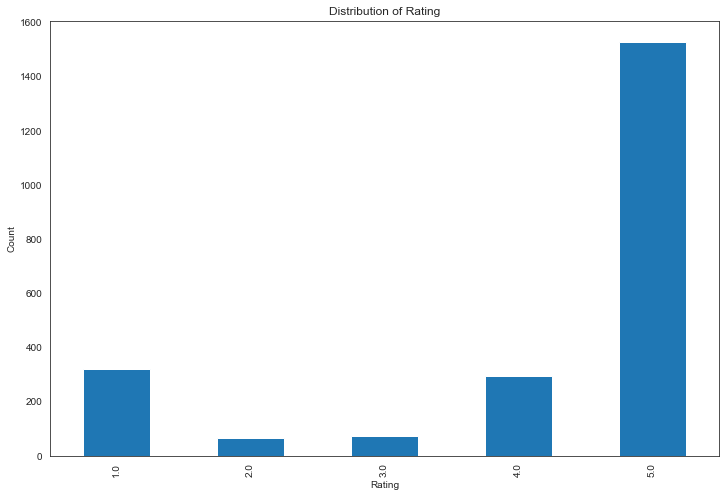

In [22]:
plt.figure(figsize=(12,8))
data['Rating'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Rating')
plt.xlabel('Rating')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

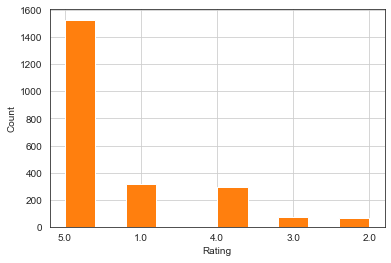

In [23]:
data.Rating.hist()
data.Rating.hist(bins=10)
plt.xlabel('Rating')
plt.ylabel('Count')

In [24]:
data.iloc[:,[3]]

,Reviews
0,\n\n It's amazing..... battery last around 10...
1,\n\n We buy macbook's expecting that it will ...
2,\n\n Pros:1. Light weight and super fast resp...
3,\n\n Best Laptop under 60k. If you don't want...
4,"\n\n Bought this product recently on 5 April,..."
...,...
2274,\n\n Good\n\n
2275,\n\n 👍👍👍\n\n
2276,\n\n Is the storage 128 gb only is sufficient...
2277,\n\n Good value\n\n


In [25]:
Reviews=data.iloc[:,[3]]

In [26]:
Reviews.shape

(2279, 1)

In [27]:
Reviews.describe()

,Reviews
count,2278
unique,2095
top,\n\n Good\n\n
freq,37


In [28]:
Reviews.dtypes

Reviews    object
dtype: object

In [29]:
# removing customer name and reviw title column as they have not that significance in output##
data.drop(["Customer Name","Review Title"],axis=1,inplace=True)

data.head()

,Rating,Reviews
0,5.0,\n\n It's amazing..... battery last around 10...
1,1.0,\n\n We buy macbook's expecting that it will ...
2,5.0,\n\n Pros:1. Light weight and super fast resp...
3,5.0,\n\n Best Laptop under 60k. If you don't want...
4,1.0,"\n\n Bought this product recently on 5 April,..."


In [30]:
data.Reviews.isna().sum()


1

In [31]:
data['Reviews']=data['Reviews'].fillna(" ")

In [32]:
data.Reviews.isna().sum()


0

In [33]:
## Cleaning the text input for betting understanding of Machine..##

##Converting all review into Lowercase..###

data['Reviews']= data['Reviews'].apply(lambda x: " ".join(word.lower() for word in x.split()))

In [34]:
## removing punctuation from review..#
import string
data['Reviews']=data['Reviews'].apply(lambda x:''.join([i for i in x  if i not in string.punctuation]))

In [37]:
## Remove Numbers from review...##
data['Reviews']=data['Reviews'].str.replace('[0-9]','')

<ipython-input-37-9babcbbb57b7>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data['Reviews']=data['Reviews'].str.replace('[0-9]','')


In [36]:
## removing all stopwords(english)....###
from nltk.corpus import stopwords

In [38]:
stop_words=stopwords.words('english')

In [39]:
data['Reviews']=data['Reviews'].apply(lambda x: " ".join(word for word in x.split() if word not in stop_words))

In [40]:
data.head(4)

,Rating,Reviews
0,5.0,amazing battery last around hrsbest laptop stu...
1,1.0,buy macbooks expecting lasts least years case ...
2,5.0,pros light weight super fast response time hig...
3,5.0,best laptop k dont want accounting softwares l...


In [41]:
from textblob import Word
data['Reviews']= data['Reviews'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

import re
pattern = r"((?<=^)|(?<= )).((?=$)|(?= ))"
data['Reviews']= data['Reviews'].apply(lambda x:(re.sub(pattern, '',x).strip()))

In [42]:
data['Reviews'].head()

0    amazing battery last around hrsbest laptop stu...
1    buy macbooks expecting last least year case sa...
2    pro light weight super fast response time high...
3    best laptop  dont want accounting software lik...
4    bought product recently april working perfectl...
Name: Reviews, dtype: object

In [43]:
from sklearn.feature_extraction.text import CountVectorizer


vec = CountVectorizer()
X = vec.fit_transform(data['Reviews'])
df = pd.DataFrame(X.toarray(), columns=vec.get_feature_names())
print(df)

      aaaaa  ab  abgn  abgnac  abide  ability  abit  able  aboutrest  abovea  \
0         0   0     0       0      0        0     0     0          0       0   
1         0   0     0       0      0        0     0     0          0       0   
2         0   0     0       0      0        0     0     0          0       0   
3         0   0     0       0      0        0     0     0          0       0   
4         0   0     0       0      0        0     0     0          0       0   
...     ...  ..   ...     ...    ...      ...   ...   ...        ...     ...   
2274      0   0     0       0      0        0     0     0          0       0   
2275      0   0     0       0      0        0     0     0          0       0   
2276      0   0     0       0      0        0     0     0          0       0   
2277      0   0     0       0      0        0     0     0          0       0   
2278      0   0     0       0      0        0     0     0          0       0   

      ...  yr  yucksoftware  zenbook  z

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()
TFIDF=tfidf.fit_transform(data['Reviews'])
print(TFIDF)

  (0, 907)	0.48591399168570365
  (0, 5136)	0.34179656900672434
  (0, 2866)	0.17583074935689333
  (0, 2436)	0.5628329988776998
  (0, 328)	0.31491380252282086
  (0, 2909)	0.30031260477892685
  (0, 488)	0.20641071790632765
  (0, 172)	0.25961801358752895
  (1, 4363)	0.2301940136872761
  (1, 1393)	0.3167784250647631
  (1, 3782)	0.21006428438853636
  (1, 2731)	0.21421614866529637
  (1, 5091)	0.16145541246354883
  (1, 5790)	0.17141346807698848
  (1, 1497)	0.1502146993539241
  (1, 636)	0.1421764893288945
  (1, 4441)	0.41026414511222625
  (1, 1115)	0.3418478859531058
  (1, 4644)	0.2324464132228769
  (1, 769)	0.23737862505530014
  (1, 6023)	0.1328242722061832
  (1, 2936)	0.23483540306447176
  (1, 1784)	0.28067083074404364
  (1, 3111)	0.2575083543540399
  (1, 707)	0.12812126238824498
  :	:
  (2278, 2104)	0.25494728914049997
  (2278, 3914)	0.24208810097838396
  (2278, 1348)	0.23296436177974972
  (2278, 4474)	0.22010517361763374
  (2278, 4148)	0.16906239697083972
  (2278, 1490)	0.1607416034516533
 

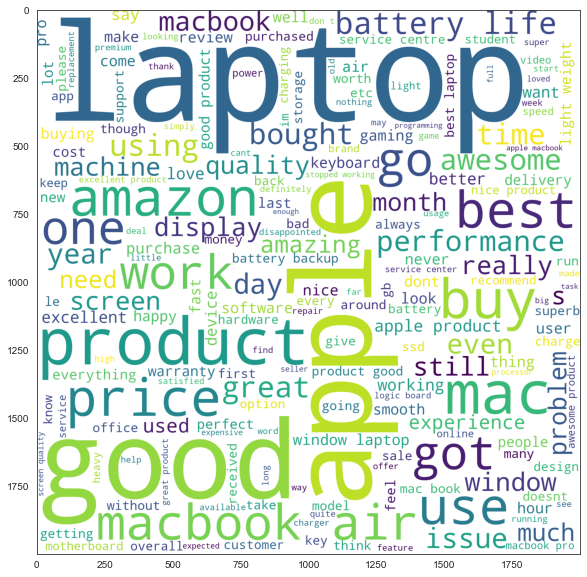

In [45]:
Review_wordcloud = ' '.join(data['Reviews'])
Q_wordcloud=WordCloud(
                    background_color='white',
                    width=2000,
                    height=2000
                   ).generate(Review_wordcloud)
fig = plt.figure(figsize = (10, 10))
plt.axis('on')
plt.imshow(Q_wordcloud)

In [46]:
data['Reviews'] = data['Reviews'].str.replace('[^\w\s]','')
data['Reviews'].head()

<ipython-input-46-b0fce8d8a108>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data['Reviews'] = data['Reviews'].str.replace('[^\w\s]','')


0    amazing battery last around hrsbest laptop stu...
1    buy macbooks expecting last least year case sa...
2    pro light weight super fast response time high...
3    best laptop  dont want accounting software lik...
4    bought product recently april working perfectl...
Name: Reviews, dtype: object

In [47]:
freq = pd.Series(' '.join(data['Reviews']).split()).value_counts()[:10]
freq

product    865
laptop     856
apple      704
good       631
macbook    464
mac        417
battery    392
air        339
best       337
buy        329
dtype: int64

In [48]:
data['Reviews'] = data['Reviews'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
data['Reviews'].head()

0            amazing last around hrsbest student coder
1    macbooks expecting last least year case saying...
2    pro light weight super fast response time high...
3    dont want accounting software like tally busy ...
4    bought recently april working perfectly fine d...
Name: Reviews, dtype: object

In [49]:
freq = pd.Series(' '.join(data['Reviews']).split()).value_counts()[-10:]
freq


serviced      1
rupeesso      1
hdas          1
monthafter    1
haze          1
aside         1
memberfor     1
tuck          1
apples        1
airbook       1
dtype: int64

In [50]:
from textblob import TextBlob
data['Reviews'][:10].apply(lambda x: str(TextBlob(x).correct()))

0            amazing last around hrsbest student cover
1    macbooks expecting last least year case saying...
2    pro light weight super fast response time high...
3    dont want accounting software like tall busy g...
4    bought recently april working perfectly fine d...
5    reason star of defective piece sound quality s...
6    upset checked day back december didn start luc...
7    hi think thousand time buying one calm night m...
8    pro user last year came across new got chance ...
9    never purchase bought start giving problem mon...
Name: Reviews, dtype: object

In [51]:
TextBlob(data['Reviews'][0]).words


WordList(['amazing', 'last', 'around', 'hrsbest', 'student', 'coder'])

In [52]:
TextBlob(data['Reviews'][1]).words

WordList(['macbooks', 'expecting', 'last', 'least', 'year', 'case', 'saying', 'cost', 'repair', 'bought', 'dont', 'want', 'repair', 'still', 'ive', 'pay', 'diagnostic', 'cost', 'recommended'])

In [53]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
data['Reviews'][:10].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

0               amaz last around hrsbest student coder
1    macbook expect last least year case say cost r...
2    pro light weight super fast respons time highl...
3    dont want account softwar like talli busi go b...
4    bought recent april work perfectli fine day ap...
5    reason star ot defect piec sound qualiti start...
6    upset check day back decemb didnt start luckil...
7    hi think thousand time buy one calm night cudd...
8    pro user last year came across new got chanc p...
9    never purchas bought start give problem month ...
Name: Reviews, dtype: object

In [54]:
from textblob import Word
data['Reviews'] = data['Reviews'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
data['Reviews'].head()

0            amazing last around hrsbest student coder
1    macbooks expecting last least year case saying...
2    pro light weight super fast response time high...
3    dont want accounting software like tally busy ...
4    bought recently april working perfectly fine d...
Name: Reviews, dtype: object

In [55]:
TextBlob(data['Reviews'][0]).ngrams(2)

[WordList(['amazing', 'last']),
 WordList(['last', 'around']),
 WordList(['around', 'hrsbest']),
 WordList(['hrsbest', 'student']),
 WordList(['student', 'coder'])]

In [56]:
tf1 = (data['Reviews'][1:10]).apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()
tf1.columns = ['words','tf']
tf1

,words,tf
0,cost,4.0
1,repair,2.0
2,macbooks,1.0
3,last,2.0
4,least,2.0
...,...,...
434,visit,1.0
435,km,1.0
436,mean,1.0
437,acting,1.0


In [57]:
for i,word in enumerate(tf1['words']):
    tf1.loc[i, 'idf'] = np.log(data.shape[0]/(len(data[data['Reviews'].str.contains(word)])))

In [58]:
tf1

,words,tf,idf
0,cost,4.0,3.040144
1,repair,2.0,3.799666
2,macbooks,1.0,5.428907
3,last,2.0,3.116372
4,least,2.0,4.735760
...,...,...,...
434,visit,1.0,5.333597
435,km,1.0,6.345198
436,mean,1.0,4.297505
437,acting,1.0,5.939733


In [59]:
tf1['tfidf'] = tf1['tf'] * tf1['idf']
tf1

,words,tf,idf,tfidf
0,cost,4.0,3.040144,12.160577
1,repair,2.0,3.799666,7.599333
2,macbooks,1.0,5.428907,5.428907
3,last,2.0,3.116372,6.232743
4,least,2.0,4.735760,9.471520
...,...,...,...,...
434,visit,1.0,5.333597,5.333597
435,km,1.0,6.345198,6.345198
436,mean,1.0,4.297505,4.297505
437,acting,1.0,5.939733,5.939733


In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=1000, lowercase=True, analyzer='word',
 stop_words= 'english',ngram_range=(1,1))
data_vect = tfidf.fit_transform(data['Reviews'])

data_vect

<2279x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 22081 stored elements in Compressed Sparse Row format>

In [61]:
from sklearn.feature_extraction.text import CountVectorizer
bow = CountVectorizer(max_features=1000, lowercase=True, ngram_range=(1,1),analyzer = "word")
data_bow = bow.fit_transform(data['Reviews'])
data_bow

<2279x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 25354 stored elements in Compressed Sparse Row format>

In [62]:
data['Reviews'][:10].apply(lambda x: TextBlob(x).sentiment)

0     (0.30000000000000004, 0.48333333333333334)
1                   (-0.15, 0.23333333333333334)
2       (0.3518253968253968, 0.6041269841269842)
3      (0.18055555555555555, 0.4601851851851852)
4                    (0.11333333333333333, 0.36)
5       (0.4055555555555556, 0.5666666666666668)
6    (-0.08833333333333333, 0.43166666666666664)
7                (-0.09843749999999998, 0.54375)
8       (0.160990146217419, 0.44677368086458996)
9                 (0.017500000000000005, 0.5175)
Name: Reviews, dtype: object

In [63]:
data['sentiment'] = data['Reviews'].apply(lambda x: TextBlob(x).sentiment[0] )
data[['Reviews','sentiment']].head()

,Reviews,sentiment
0,amazing last around hrsbest student coder,0.300000
1,macbooks expecting last least year case saying...,-0.150000
2,pro light weight super fast response time high...,0.351825
3,dont want accounting software like tally busy ...,0.180556
4,bought recently april working perfectly fine d...,0.113333


In [64]:
!pip install gensim
from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

In [65]:
from gensim.scripts.glove2word2vec import glove2word2vec
glove_input_file = 'negative-words.txt'
word2vec_output_file = 'positive-words.txtpd.read_csv'

In [66]:
import collections
from collections import Counter
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shashank\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [67]:
from textblob import TextBlob
data['polarity'] = data['Reviews'].apply(lambda x: TextBlob(x).sentiment[0])
data[['Reviews','polarity']].head(5)

,Reviews,polarity
0,amazing last around hrsbest student coder,0.300000
1,macbooks expecting last least year case saying...,-0.150000
2,pro light weight super fast response time high...,0.351825
3,dont want accounting software like tally busy ...,0.180556
4,bought recently april working perfectly fine d...,0.113333


In [68]:
# Displaying top 5 positive posts of Category_A
data[data.polarity>0].head(5)

,Rating,Reviews,sentiment,polarity
0,5.0,amazing last around hrsbest student coder,0.300000,0.300000
2,5.0,pro light weight super fast response time high...,0.351825,0.351825
3,5.0,dont want accounting software like tally busy ...,0.180556,0.180556
4,1.0,bought recently april working perfectly fine d...,0.113333,0.113333
5,1.0,reason star ot defective piece sound quality s...,0.405556,0.405556


In [69]:
def sent_type(text): 
    for i in (text):
        if i>0:
            print('positive')
        elif i==0:
            print('neutral')
        else:
            print('negative')

In [70]:
sent_type(data['polarity'])

positive
negative
positive
positive
positive
positive
negative
negative
positive
positive
neutral
negative
negative
neutral
positive
neutral
positive
negative
negative
neutral
negative
positive
positive
positive
positive
negative
positive
positive
negative
neutral
positive
negative
positive
negative
positive
negative
negative
positive
positive
negative
positive
positive
positive
positive
neutral
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
negative
negative
positive
positive
positive
positive
negative
negative
negative
positive
negative
neutral
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
negative
positive
positive
positive
positive
neutral
positive
negative
positive
positive
positive
negative
neutral
negative
neutral
negative
positive
negative
positive
positive
negative
positive
negative
negative
negative
positive
positive
negative
positive
positive
positive
negative
positive
positive
po

In [71]:
data["category"]=data['polarity']

In [72]:
data.loc[data.category > 0,'category']="Positive"
data.loc[data.category !='Positive','category']="Negative"

In [73]:
data["category"]=data["category"].astype('category')
data.dtypes

Rating         object
Reviews        object
sentiment     float64
polarity      float64
category     category
dtype: object

<AxesSubplot:xlabel='category', ylabel='count'>

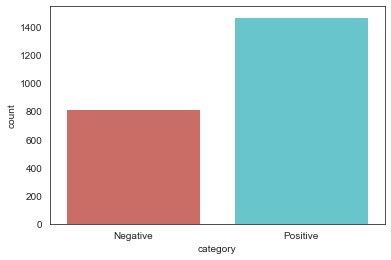

In [74]:
sns.countplot(x='category',data=data,palette='hls')

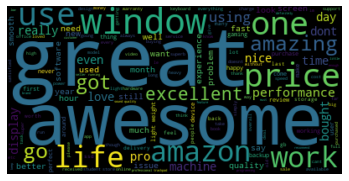

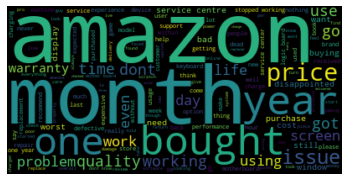

In [75]:
positive_reviews= data[data.category=='Positive']
negative_reviews= data[data.category=='Negative']
positive_reviews_text=" ".join(positive_reviews.Reviews.to_numpy().tolist())
negative_reviews_text=" ".join(negative_reviews.Reviews.to_numpy().tolist())
positive_reviews_cloud=WordCloud(background_color='black',max_words=150).generate(positive_reviews_text)
negative_reviews_cloud=WordCloud(background_color='black',max_words=150).generate(negative_reviews_text)
plt.imshow(positive_reviews_cloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0) 
plt.show()
plt.imshow(negative_reviews_cloud,interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0) 
plt.show()